In [1]:
import os
import pandas as pd
from statsmodels.stats.proportion import proportion_confint
import numpy as np
from sklearn.decomposition import PCA
import h5py
from scipy.cluster.hierarchy import fcluster, linkage
from collections import Counter
import pickle
    
with open('../src/ensembl2genename.p', 'rb') as reader:
    gid2gn = pickle.load(reader)

In [2]:
id2phenotype = pd.read_csv('../../processed_data/selected_phenotypes.txt', header = None)[0].values

In [3]:
import os
import sys
sys.path.append(os.path.abspath('../src'))

import pandas as pd
import pickle
import scipy.stats as stats
import numpy as np
from enrichment_helper import *


In [4]:
p0 = 'IBD.EUR.Crohns_Disease'

with open('./detect_drive_genes.p', 'rb') as reader:
    drivers = set([gid2gn[item[0]] for s, item in pickle.load(reader)[p0]])

In [5]:
#!/usr/bin/env python
import pandas
import sqlite3

connection = sqlite3.connect("../../data/gwas_g2p/metaxcan_results_p/metaxcan_results_v1.5.db")

query = 'SELECT g.gene_name, m.zscore, m.n_snps_used, m.n_snps_model, p.tag as phenotype, t.tissue as tissue, g.gene ' 
query += ' FROM gene AS g INNER JOIN metaxcan_result AS m ON g.id = m.gene_id' 
query += ' INNER JOIN tissue AS t ON t.id = m.tissue_id  INNER JOIN pheno AS p ON p.id = m.pheno_id'
query += ' WHERE p.tag = \'%s\'' % p0

pi = pandas.read_sql_query(query, connection)
pi = pi[pi.tissue != 'DGN_WB']


In [6]:
try:
    import cPickle as pickle
except:
    import pickle

In [7]:
from scipy.stats import norm 
import statsmodels.stats.multitest as multi

In [9]:
from scipy.stats import norm 
import statsmodels.stats.multitest as multi

pvals = norm.sf(np.abs(pi.zscore)) * 2
_, res_adjp, _, _ = multi.multipletests(pvals)

In [10]:
sgenes = set(pi.gene_name[res_adjp < 0.05])
print len(sgenes)

150


In [12]:
## Lincs 1000
df0 = pd.read_csv('../../../data/CREED/Disease_entire_exp_landmark.tsv.gz', sep = '\t')
df1 = pd.read_csv('../../../data/CREED/Disease_signatures_info_data.tsv', sep = '\t')

ind = [d0 for d0, d1 in zip(df1.id, df1.disease_name) if 'bowel' in d1.lower() or 'crohn' in d1.lower()]
dis = df0[ind].values.T
dis = dis / np.linalg.norm(dis, axis = 1, keepdims=True)

In [13]:
with open('CD_signatures/REF_lincs_l1000.p', 'rb') as f:
    res = pickle.load(f)

In [14]:
cd_ref = np.vstack([item[u'chdirLm'] for item in res]) 
cd_ref /= (np.sqrt(np.sum(cd_ref **2, axis = 1)) + 1e-5)[:, np.newaxis]

In [15]:
cd_ref.shape

(10000, 978)

In [16]:
dis0 = dis[:1, :]

In [51]:
vecs_ref = cd_ref.dot(dis.T)

NormaltestResult(statistic=193.3766628927087, pvalue=1.0204487274165019e-42)


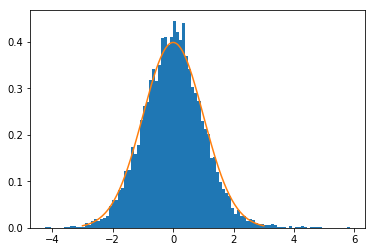

NormaltestResult(statistic=2.7556357692756457, pvalue=0.2521281258827606)


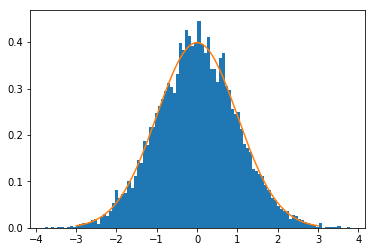

NormaltestResult(statistic=263.7491620240893, pvalue=5.34068745517304e-58)


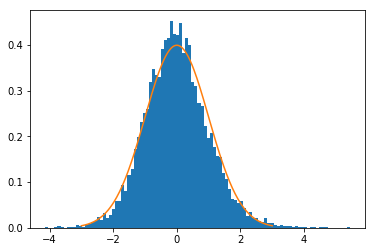

NormaltestResult(statistic=0.7343186615336235, pvalue=0.6926992679458597)


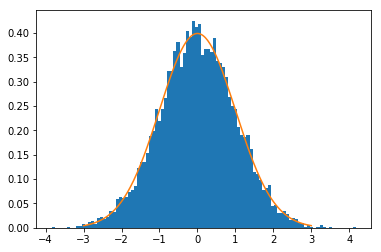

NormaltestResult(statistic=77.43246800797547, pvalue=1.5337451838301987e-17)


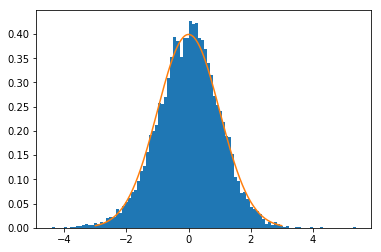

In [52]:
for i in range(5):
    vec = vecs_ref[:, i]
    vec = (vec - vec.mean()) / vec.std()
    print stats.mstats.normaltest(vec)
    xx = np.linspace(-3, 3, 201)
    pdf_val = stats.norm.pdf(xx)
    plt.hist(vec, bins = 100, normed=True)
    plt.plot(xx, pdf_val)
    plt.show()

In [64]:
with open('CD_signatures/CD_lincs_l1000.p', 'rb') as f:
    res = pickle.load(f)

In [53]:
vecs_ref.mean(axis = 0, keepdims = True)

array([[-0.00556191,  0.0115824 ,  0.00555652,  0.00650444,  0.0012835 ]])

In [66]:
def lincs_match(target, res, dis, cd_ref, alpha_sig = 0.05):
    
    lincs_res = {}
    dis = dis / (np.linalg.norm(dis, axis = 1, keepdims=True) + 1e-7)
    
    vecs_ref = cd_ref.dot(dis.T)
    mu_ref = vecs_ref.mean(axis = 0, keepdims = True)
    sig_ref = vecs_ref.std(axis = 0, keepdims = True)
    
    for t in target:
        if t not in res or not res[t]:
            continue
            
        item0 = res[t]
        #print t
        shrna = np.vstack([item[u'chdirLm'] for item in item0]) 
        shrna /= (np.sqrt(np.sum(shrna **2, axis = 1)) + 1e-5)[:, np.newaxis]
        vec = shrna.dot(dis.T) 
        z_vec = (vec - mu_ref) / sig_ref
        pval = stats.norm.sf(np.abs(z_vec)) * 2
        lincs_res[t] = [multipletests(pval.flatten(), alpha = alpha_sig)[0].sum(), len(vec.flatten())]
    return lincs_res

In [67]:
lincs_match(sgenes, res, dis, cd_ref, alpha_sig = 0.05)

{u'ADAM15': [0, 165],
 u'ADO': [1, 195],
 u'AIRE': [1, 210],
 u'APEH': [0, 175],
 u'ARFRP1': [1, 135],
 u'ATG16L1': [0, 275],
 u'CAMKV': [0, 50],
 u'CARD9': [3, 275],
 u'CDC37': [0, 135],
 u'CISD1': [0, 240],
 u'CLN3': [1, 135],
 u'CREM': [0, 170],
 u'CYLD': [1, 40],
 u'DAG1': [0, 120],
 u'DDAH2': [0, 175],
 u'DDX39B': [0, 135],
 u'EPOR': [0, 135],
 u'ERAP2': [0, 150],
 u'FADS1': [0, 135],
 u'GBA': [0, 165],
 u'GMEB2': [1, 165],
 u'GPSM1': [1, 135],
 u'GPX1': [0, 135],
 u'GPX4': [2, 115],
 u'GSDMB': [0, 165],
 u'HCN3': [0, 135],
 u'IER3': [0, 195],
 u'IL13': [0, 230],
 u'IL18RAP': [0, 235],
 u'IL27': [0, 165],
 u'IL5': [0, 170],
 u'IP6K2': [0, 225],
 u'IRF1': [0, 120],
 u'IRGM': [2, 230],
 u'MST1': [1, 145],
 u'MST1R': [0, 705],
 u'NDFIP1': [0, 165],
 u'NKX2-3': [0, 135],
 u'NOD2': [0, 165],
 u'ORM1': [0, 135],
 u'P4HA2': [2, 390],
 u'PAPD5': [0, 40],
 u'PDLIM4': [1, 165],
 u'PFKFB4': [0, 50],
 u'PKLR': [0, 50],
 u'PRKAA1': [0, 235],
 u'PTGER4': [0, 210],
 u'QARS': [0, 120],
 u'RAD50':

In [63]:
len(res)

10000